In [1]:
import os, sys
sys.path.append( os.path.join('..', '..'))

from scipy.constants import e, k, epsilon_0
import numpy as np
import matplotlib.pyplot as plt

# my own modules
from src.solver import Schrodinger_solver1D as solver1D
from src.model import potential 

# Infinite Quantum Well

In [2]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: np.zeros_like(x)

<Axes: xlabel='x', ylabel='V(x)'>

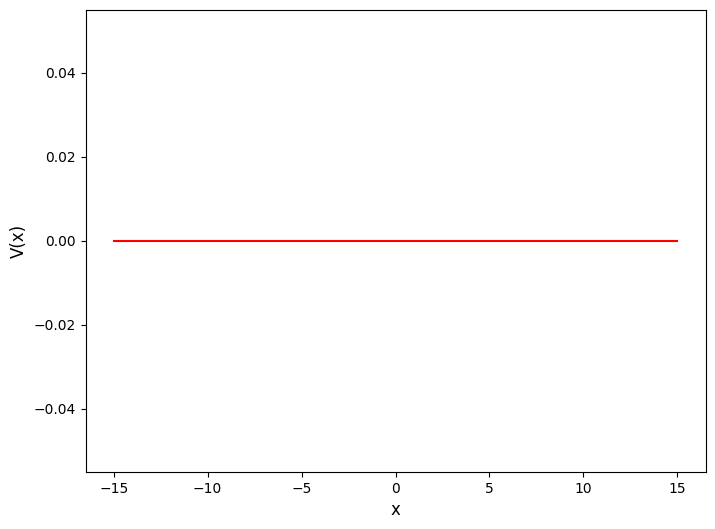

In [3]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

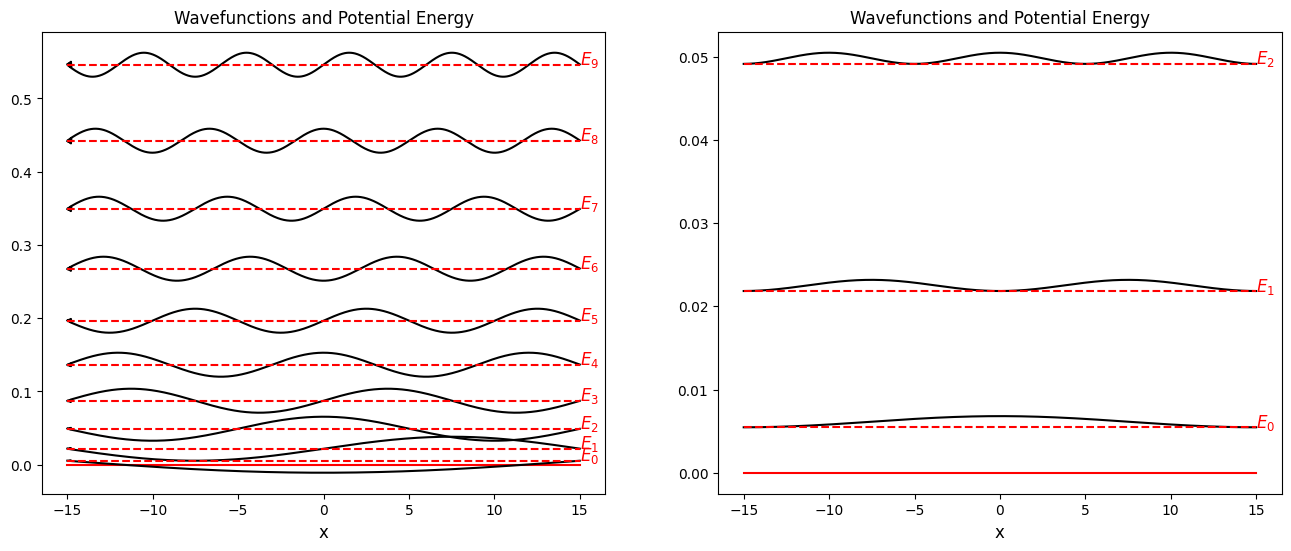

In [4]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=E[1] - E[0])

_, ax = plt.subplots(1, 2, figsize=(8*2, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0], E[1], E[2]], [Psis[0], Psis[1], Psis[2]], V_fun(x), labels = [f'$E_0$',f'$E_1$',f'$E_2$'], ax = ax[1], format='prob', scaling=5.0)

Becasue of boundary condition, the wave function at the boundary is always zero, which is the same as infinite quantum well.

# Single Quantum Well

In [5]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[-2, 2], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

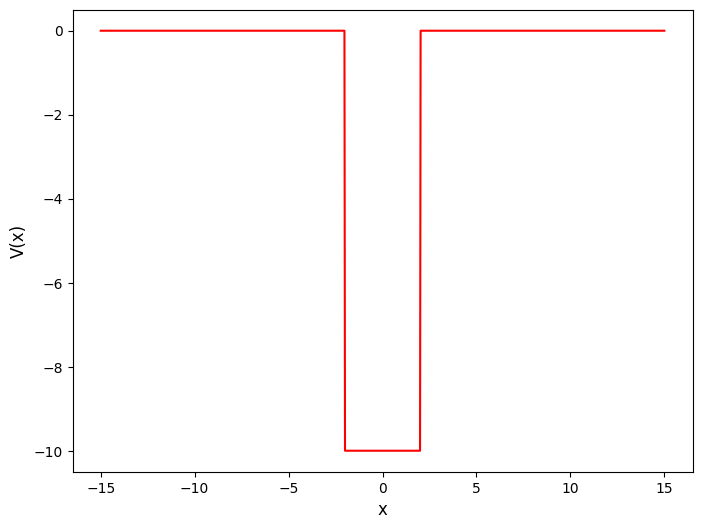

In [6]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

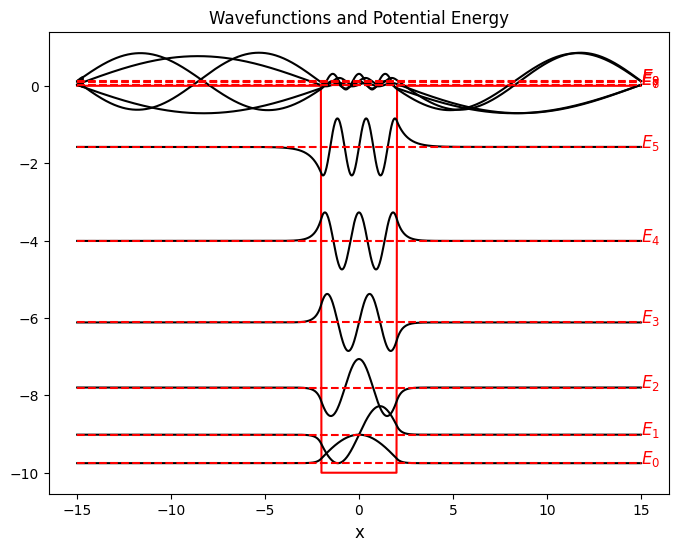

In [7]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=E[1] - E[0])
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

Interestingly, when it is an even quantum number, the wavefunction is symmetric but when it is an odd number, the wavefunctions would become anti-symmetric. <br>

Theoretically, when E is larger than the well height, the energy should not be quantized. However, in the simulation, we set the wave functions at the boundary is always zero. This would be like another infinite well out of the simulation boundary. Therefore, a energy quantized would be observed in this cases. Besides, the grid size would also influence but in this case the dominant term is the boundary conditions.


# Two Quantum Wells

In [8]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-6, -2], [2,6] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

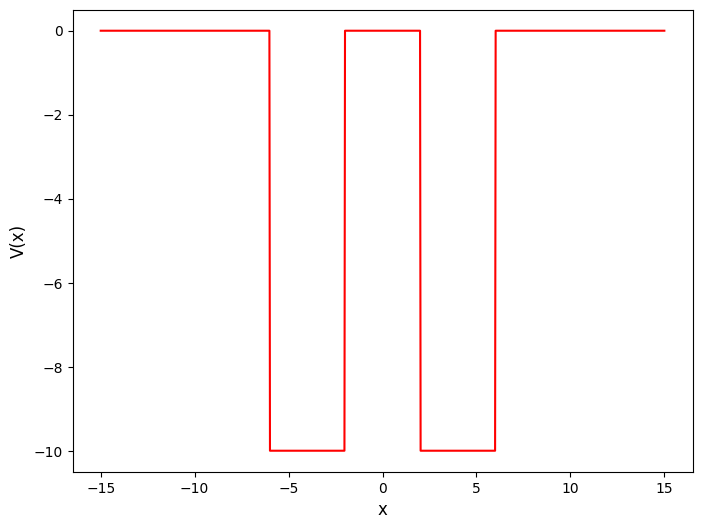

In [9]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

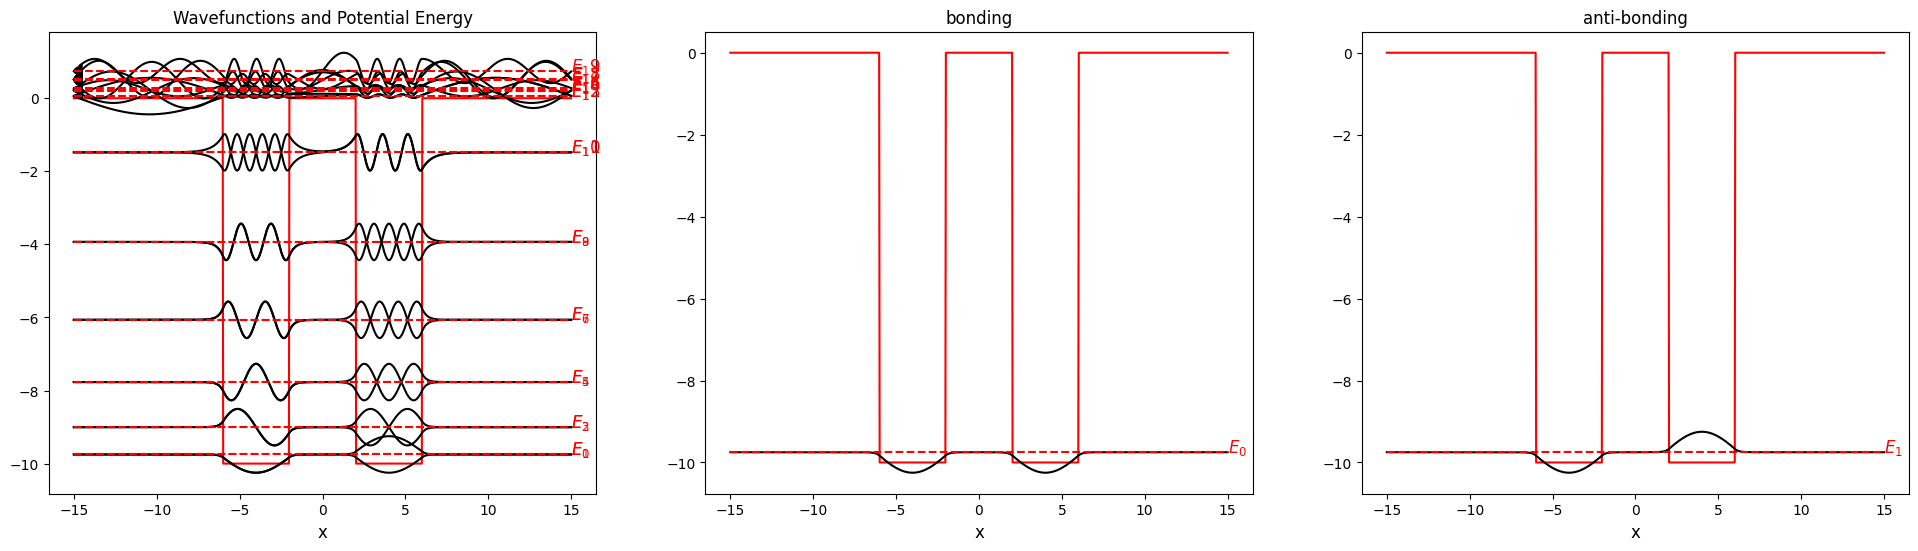

In [10]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = 'bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = 'anti-bonding')

Because of the highly symmetric of potential energy, there would be two degenerate states of each energy level, including bonding and anti-bonding cases.

# Two Quantum Wells / Unbalanced

In [11]:
""" setting """
m = 1
V0 = 0
V1 = -10
V2 = -8
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range = [-6, -2], V0=V0, V1 = V1) + potential.finite_wells_potential(x=x, x_range = [2, 6], V0=V0, V1 = V2)

<Axes: xlabel='x', ylabel='V(x)'>

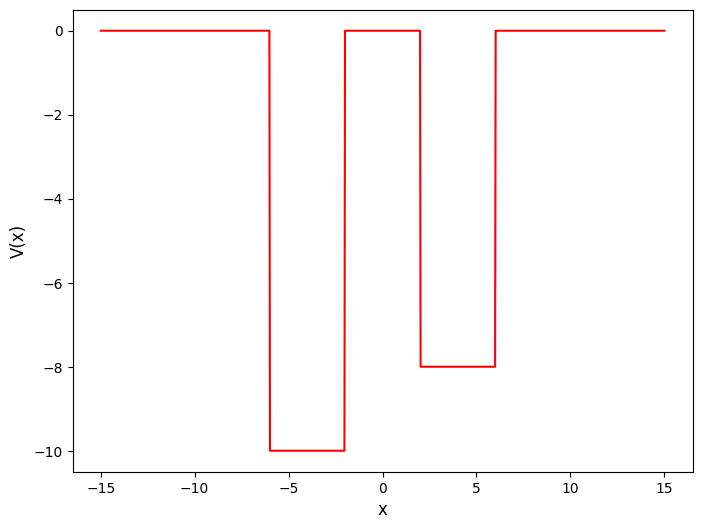

In [12]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

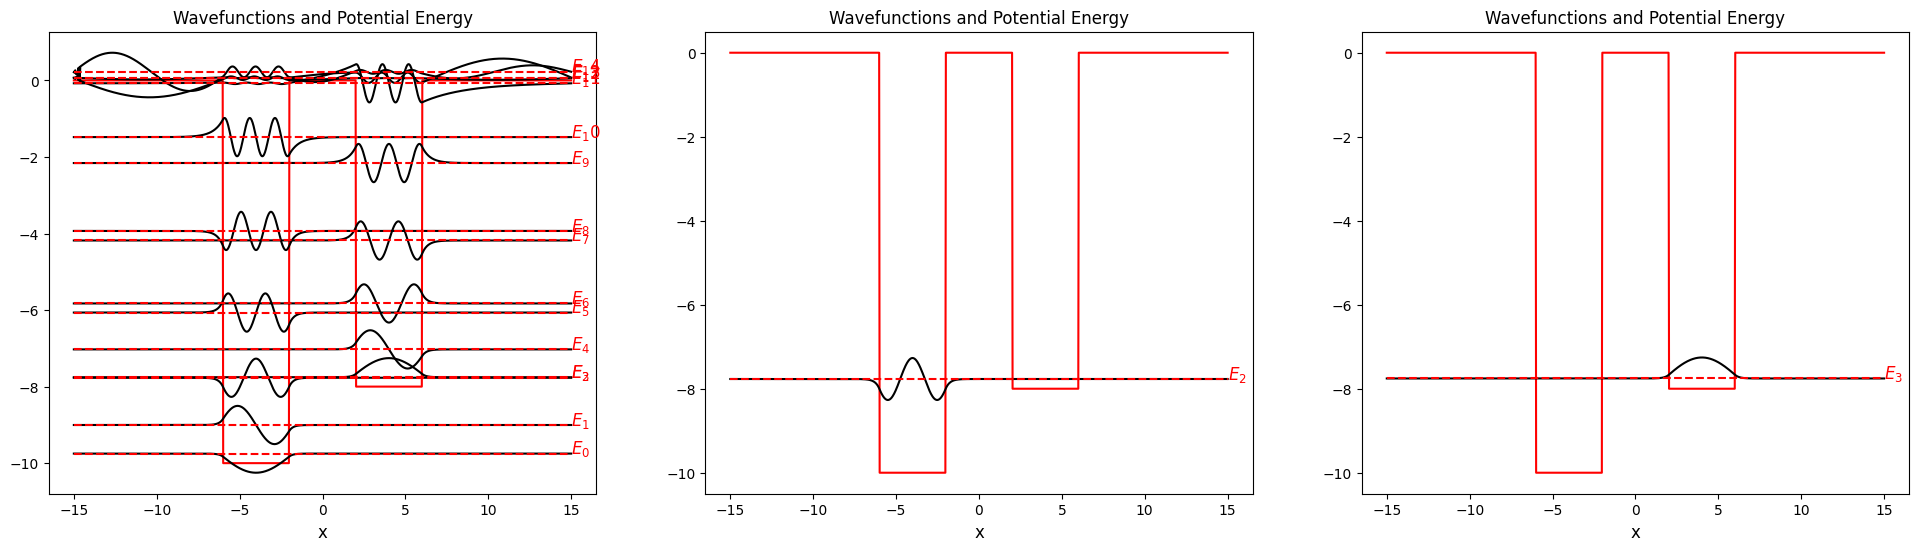

In [13]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1])
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2])

The unsymmetric potential energy would break down the degenerate states. However, $E_2$ and $E_3$ are still degenerate. The user can change the height and the width of one quantum well. Then, the user could find that this degerate states will also be broken.

# Triple Quantum Wells 

In [14]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.finite_wells_potential(x=x, x_range=[ [-10, -6], [-2,2], [6,10] ], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

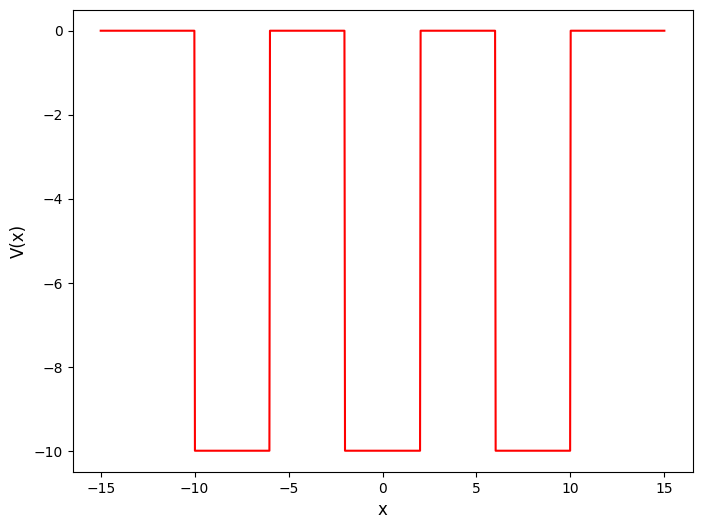

In [15]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'state 2 - bonding'}, xlabel='x'>

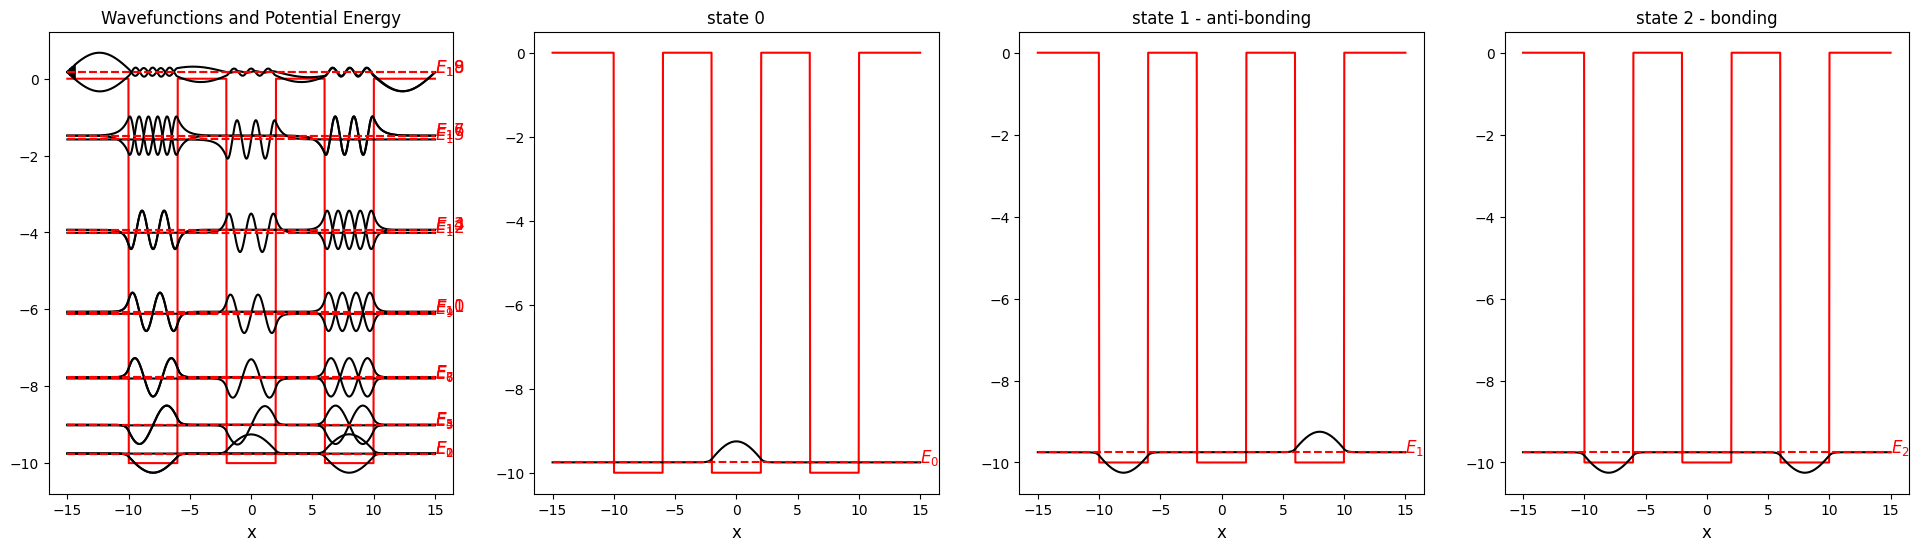

In [16]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 20, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 4, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[0]], [Psis[0]], V_fun(x), labels = [f'$E_0$',], ax = ax[1], title = 'state 0')
solver1D.plot_wavefunctions_and_potential(x, [E[1]], [Psis[1]], V_fun(x), labels = [f'$E_1$',], ax = ax[2], title = 'state 1 - anti-bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[3], title = 'state 2 - bonding')

# Single Triangle Well

In [17]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range=[-3, 3], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

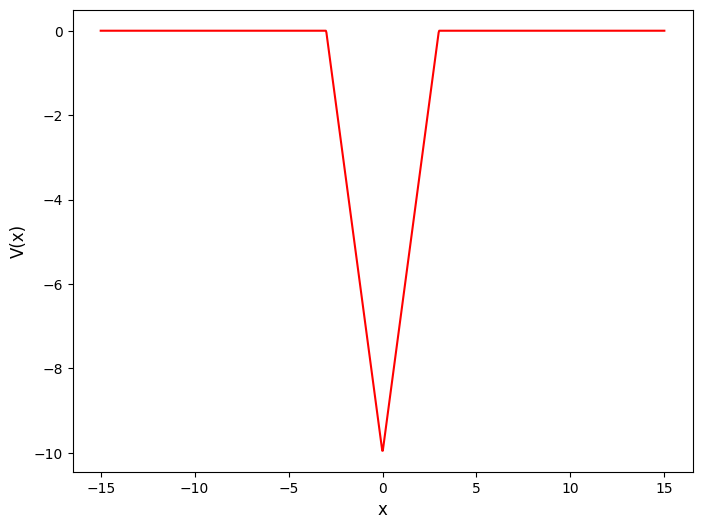

In [18]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

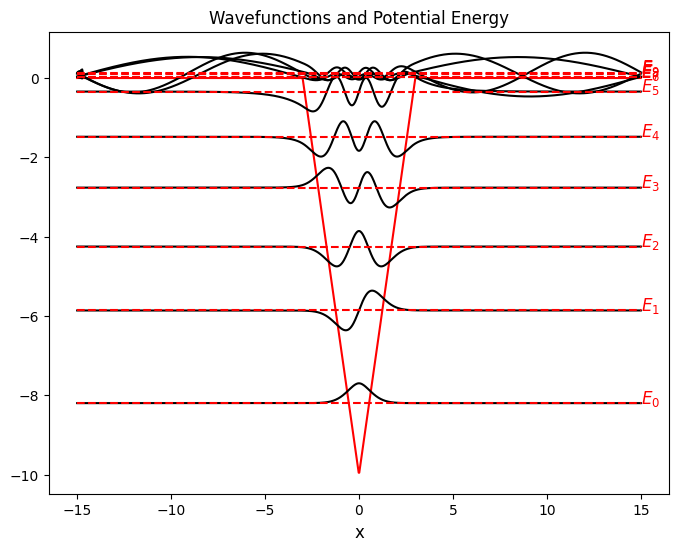

In [19]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

# Two Triangle Wells

In [20]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-9, -3], [3, 9]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

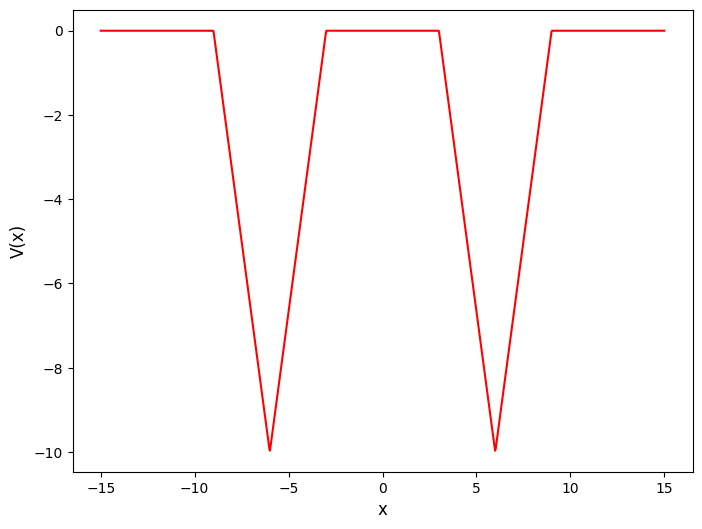

In [21]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

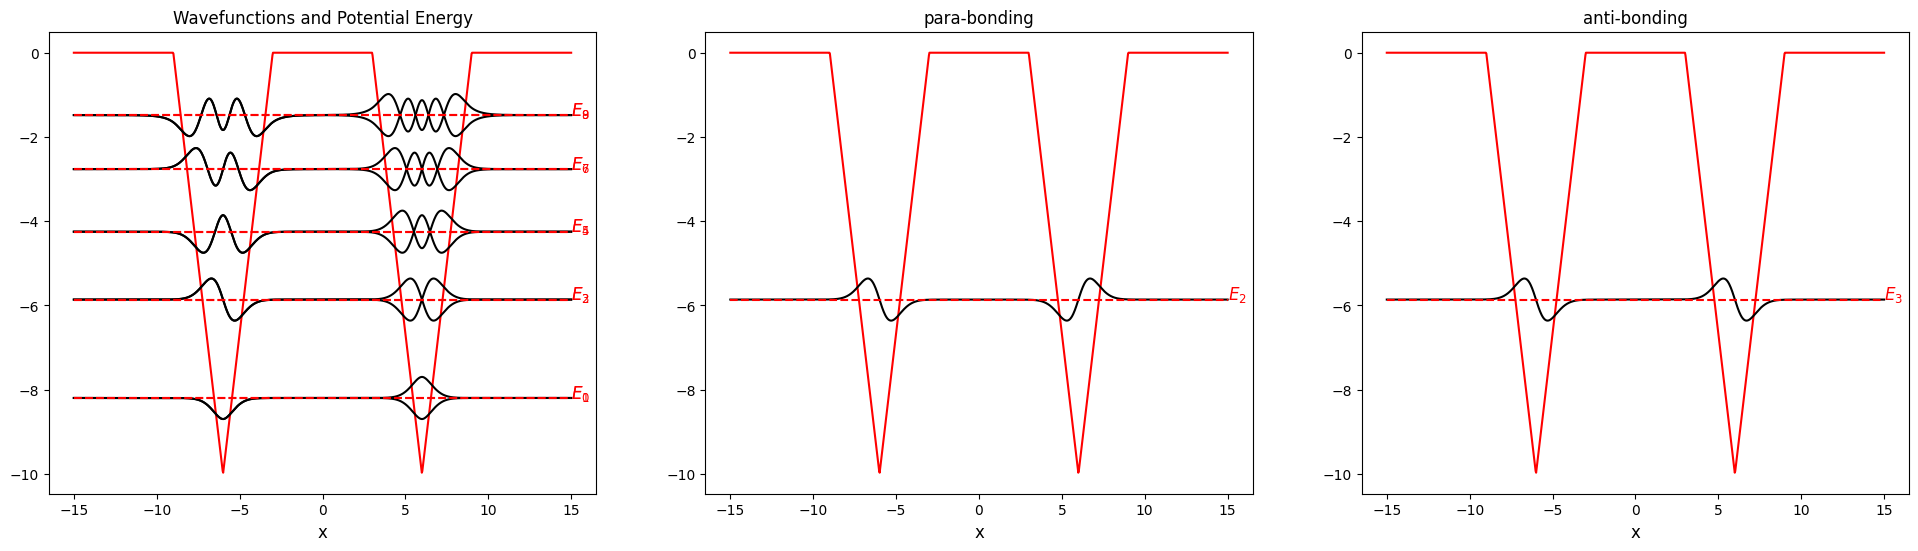

In [22]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

# Two Triangle Wells / Side by side

In [23]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-6, 0], [0, 6]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

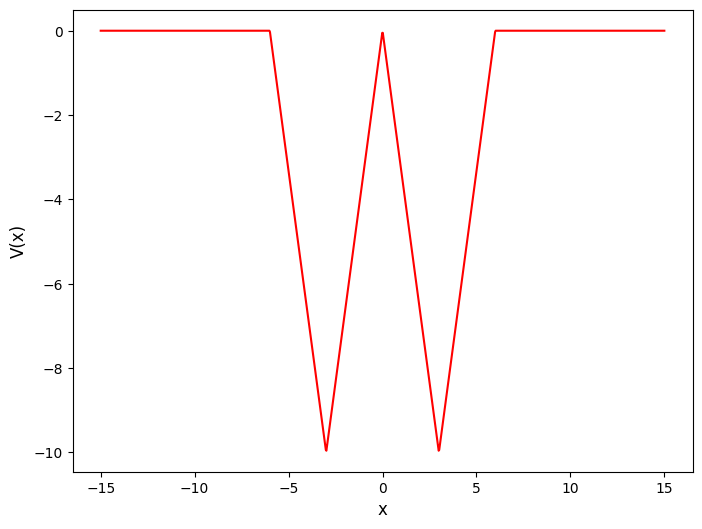

In [24]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

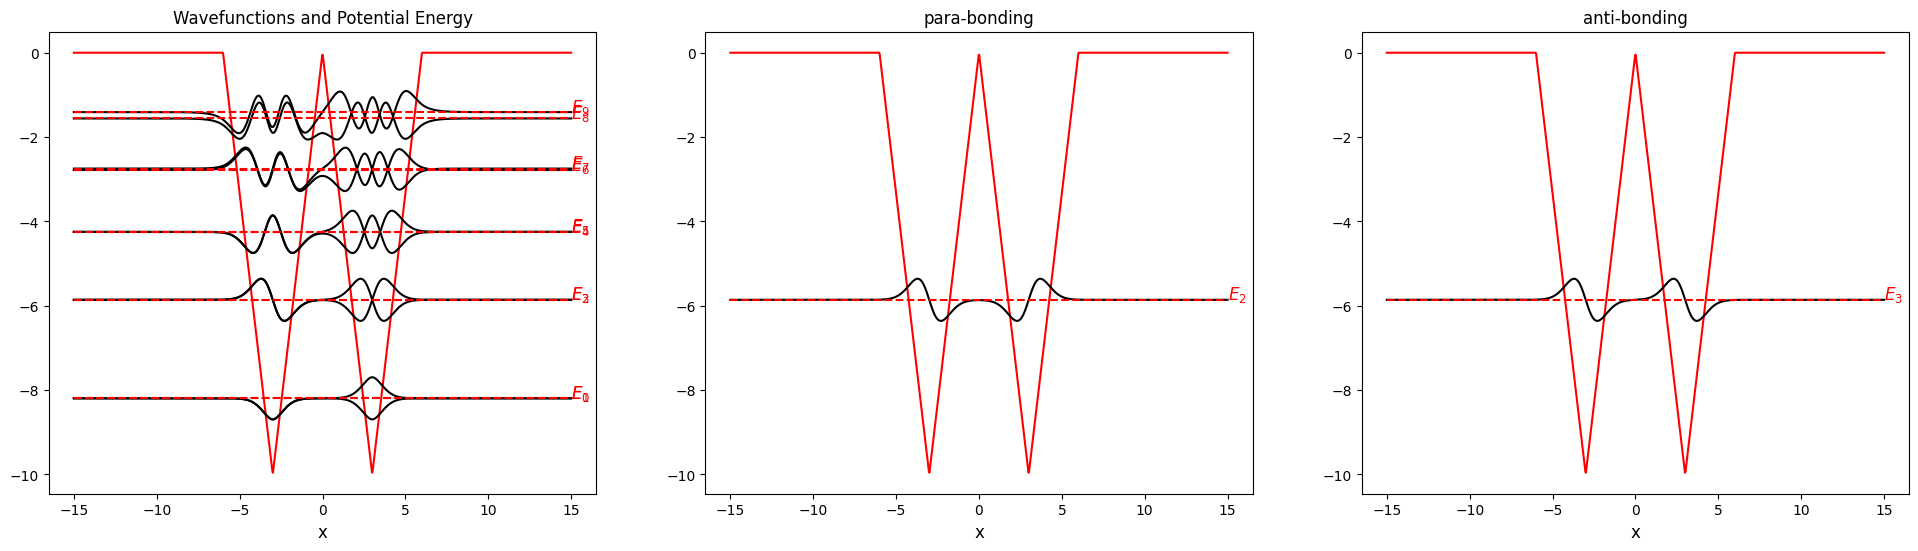

In [25]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

# Two Triangle Wells / Coupled

In [26]:
""" setting """
m = 1
V0 = 0
V1 = -10
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.triangle_potential(x=x, x_range= [[-5, 1], [-1, 5]], V0=V0, V1 = V1)

<Axes: xlabel='x', ylabel='V(x)'>

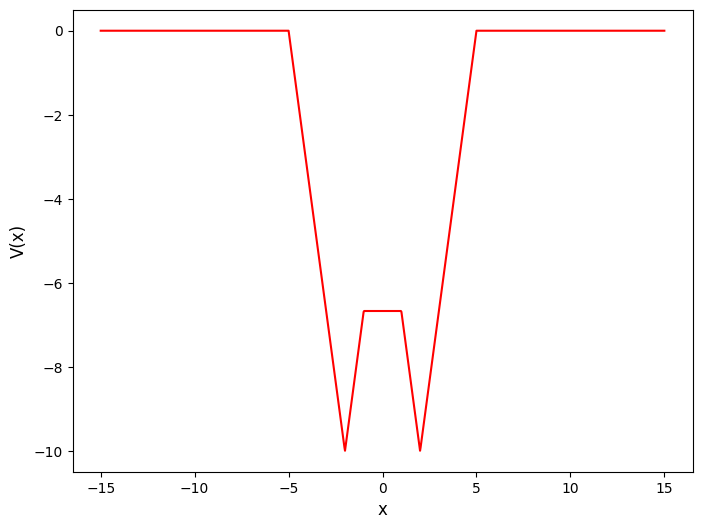

In [27]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'anti-bonding'}, xlabel='x'>

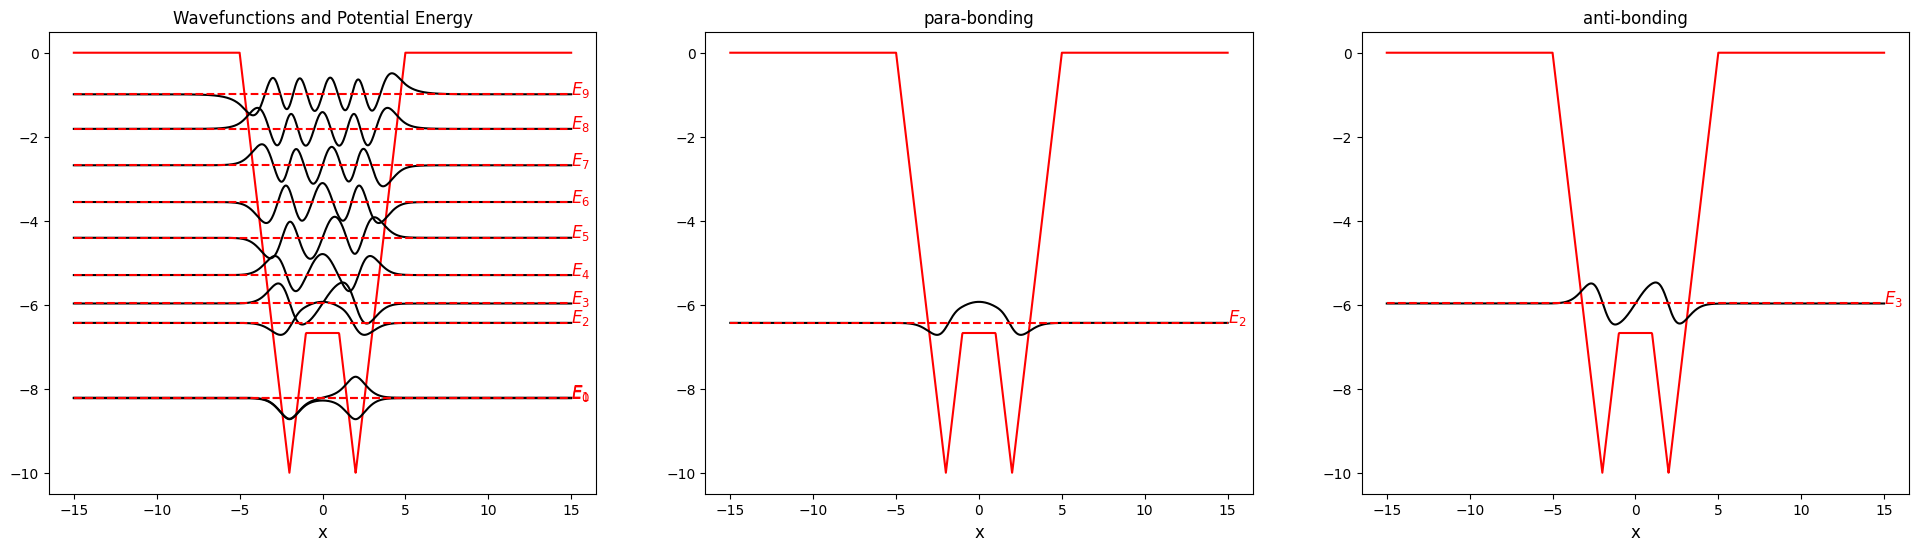

In [28]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 10, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(1, 3, figsize=(8*3, 6))
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
solver1D.plot_wavefunctions_and_potential(x, [E[2]], [Psis[2]], V_fun(x), labels = [f'$E_2$',], ax = ax[1], title = 'bonding')
solver1D.plot_wavefunctions_and_potential(x, [E[3]], [Psis[3]], V_fun(x), labels = [f'$E_3$',], ax = ax[2], title = 'anti-bonding')

In previous two cases, state 2 and 3 are degenerate. However, as two triangle quantum become closer, two wavefunction start interfere with each other, which would cause energy difference between para- and anti- bonding. Becuase the derivative (momentum) of para-bonding is less than the previous cases, the total energy would also become less the previous E2. In constrast, E3 are roughly the same as previous cases.

# 1/r potential 

In [29]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-15, 15, 1000) # cm
V_fun = lambda x: potential.inverse_r_potential(x=x, x0 = 0.0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)

<Axes: xlabel='x', ylabel='V(x)'>

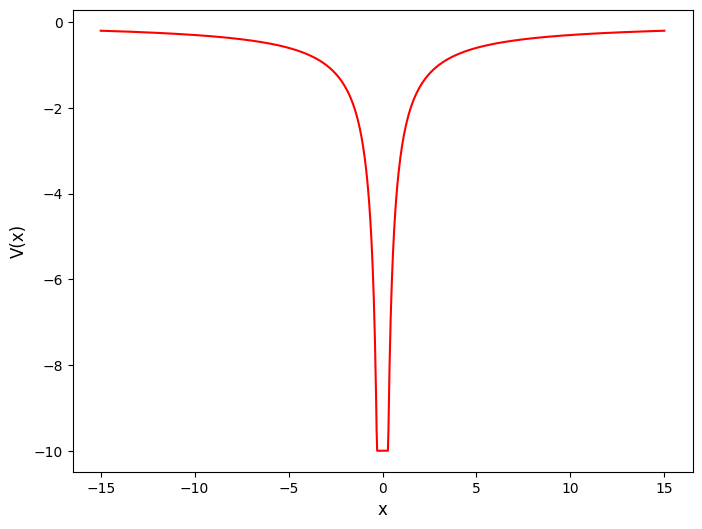

In [30]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

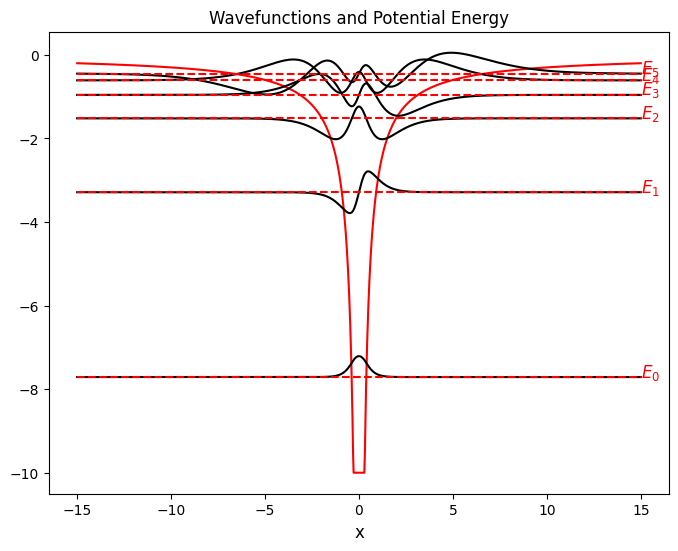

In [31]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 6, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

In this case, we simulate 1/r potential, which is similar to gauss's law. However, the user need to remember that this is 1D case and it still different from 3D case. Besides, to prevent negative infinity point (sigularity) in simulation, we truncate the potention to some lowest value. Similar to hydrogen atom, the energy level difference is large when n is small. As n increase the energy level difference would decrease. 

# 1/r potential train

In [32]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-20, 20, 3000) # cm
x0_train = [-10.0, -5.0, 0.0, 5.0, 10.0]

def V_fun(x:np.ndarray):
    V = np.zeros_like(x)
    for x0 in x0_train:
        V += potential.inverse_r_potential(x=x, x0 = x0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)
    return V

<Axes: xlabel='x', ylabel='V(x)'>

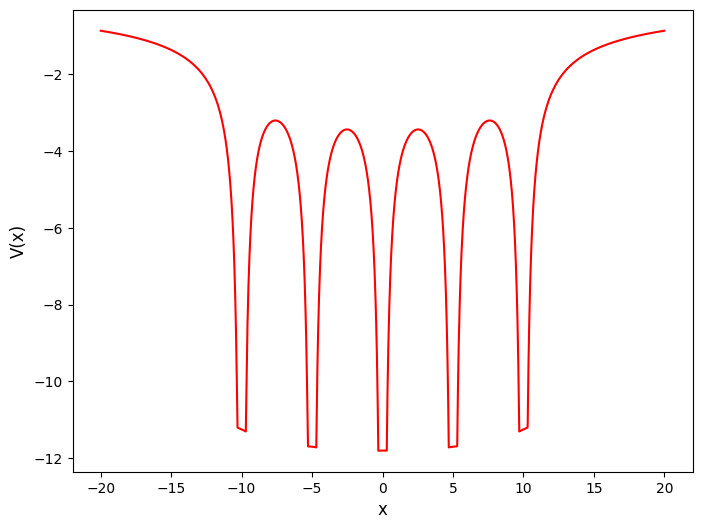

In [33]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

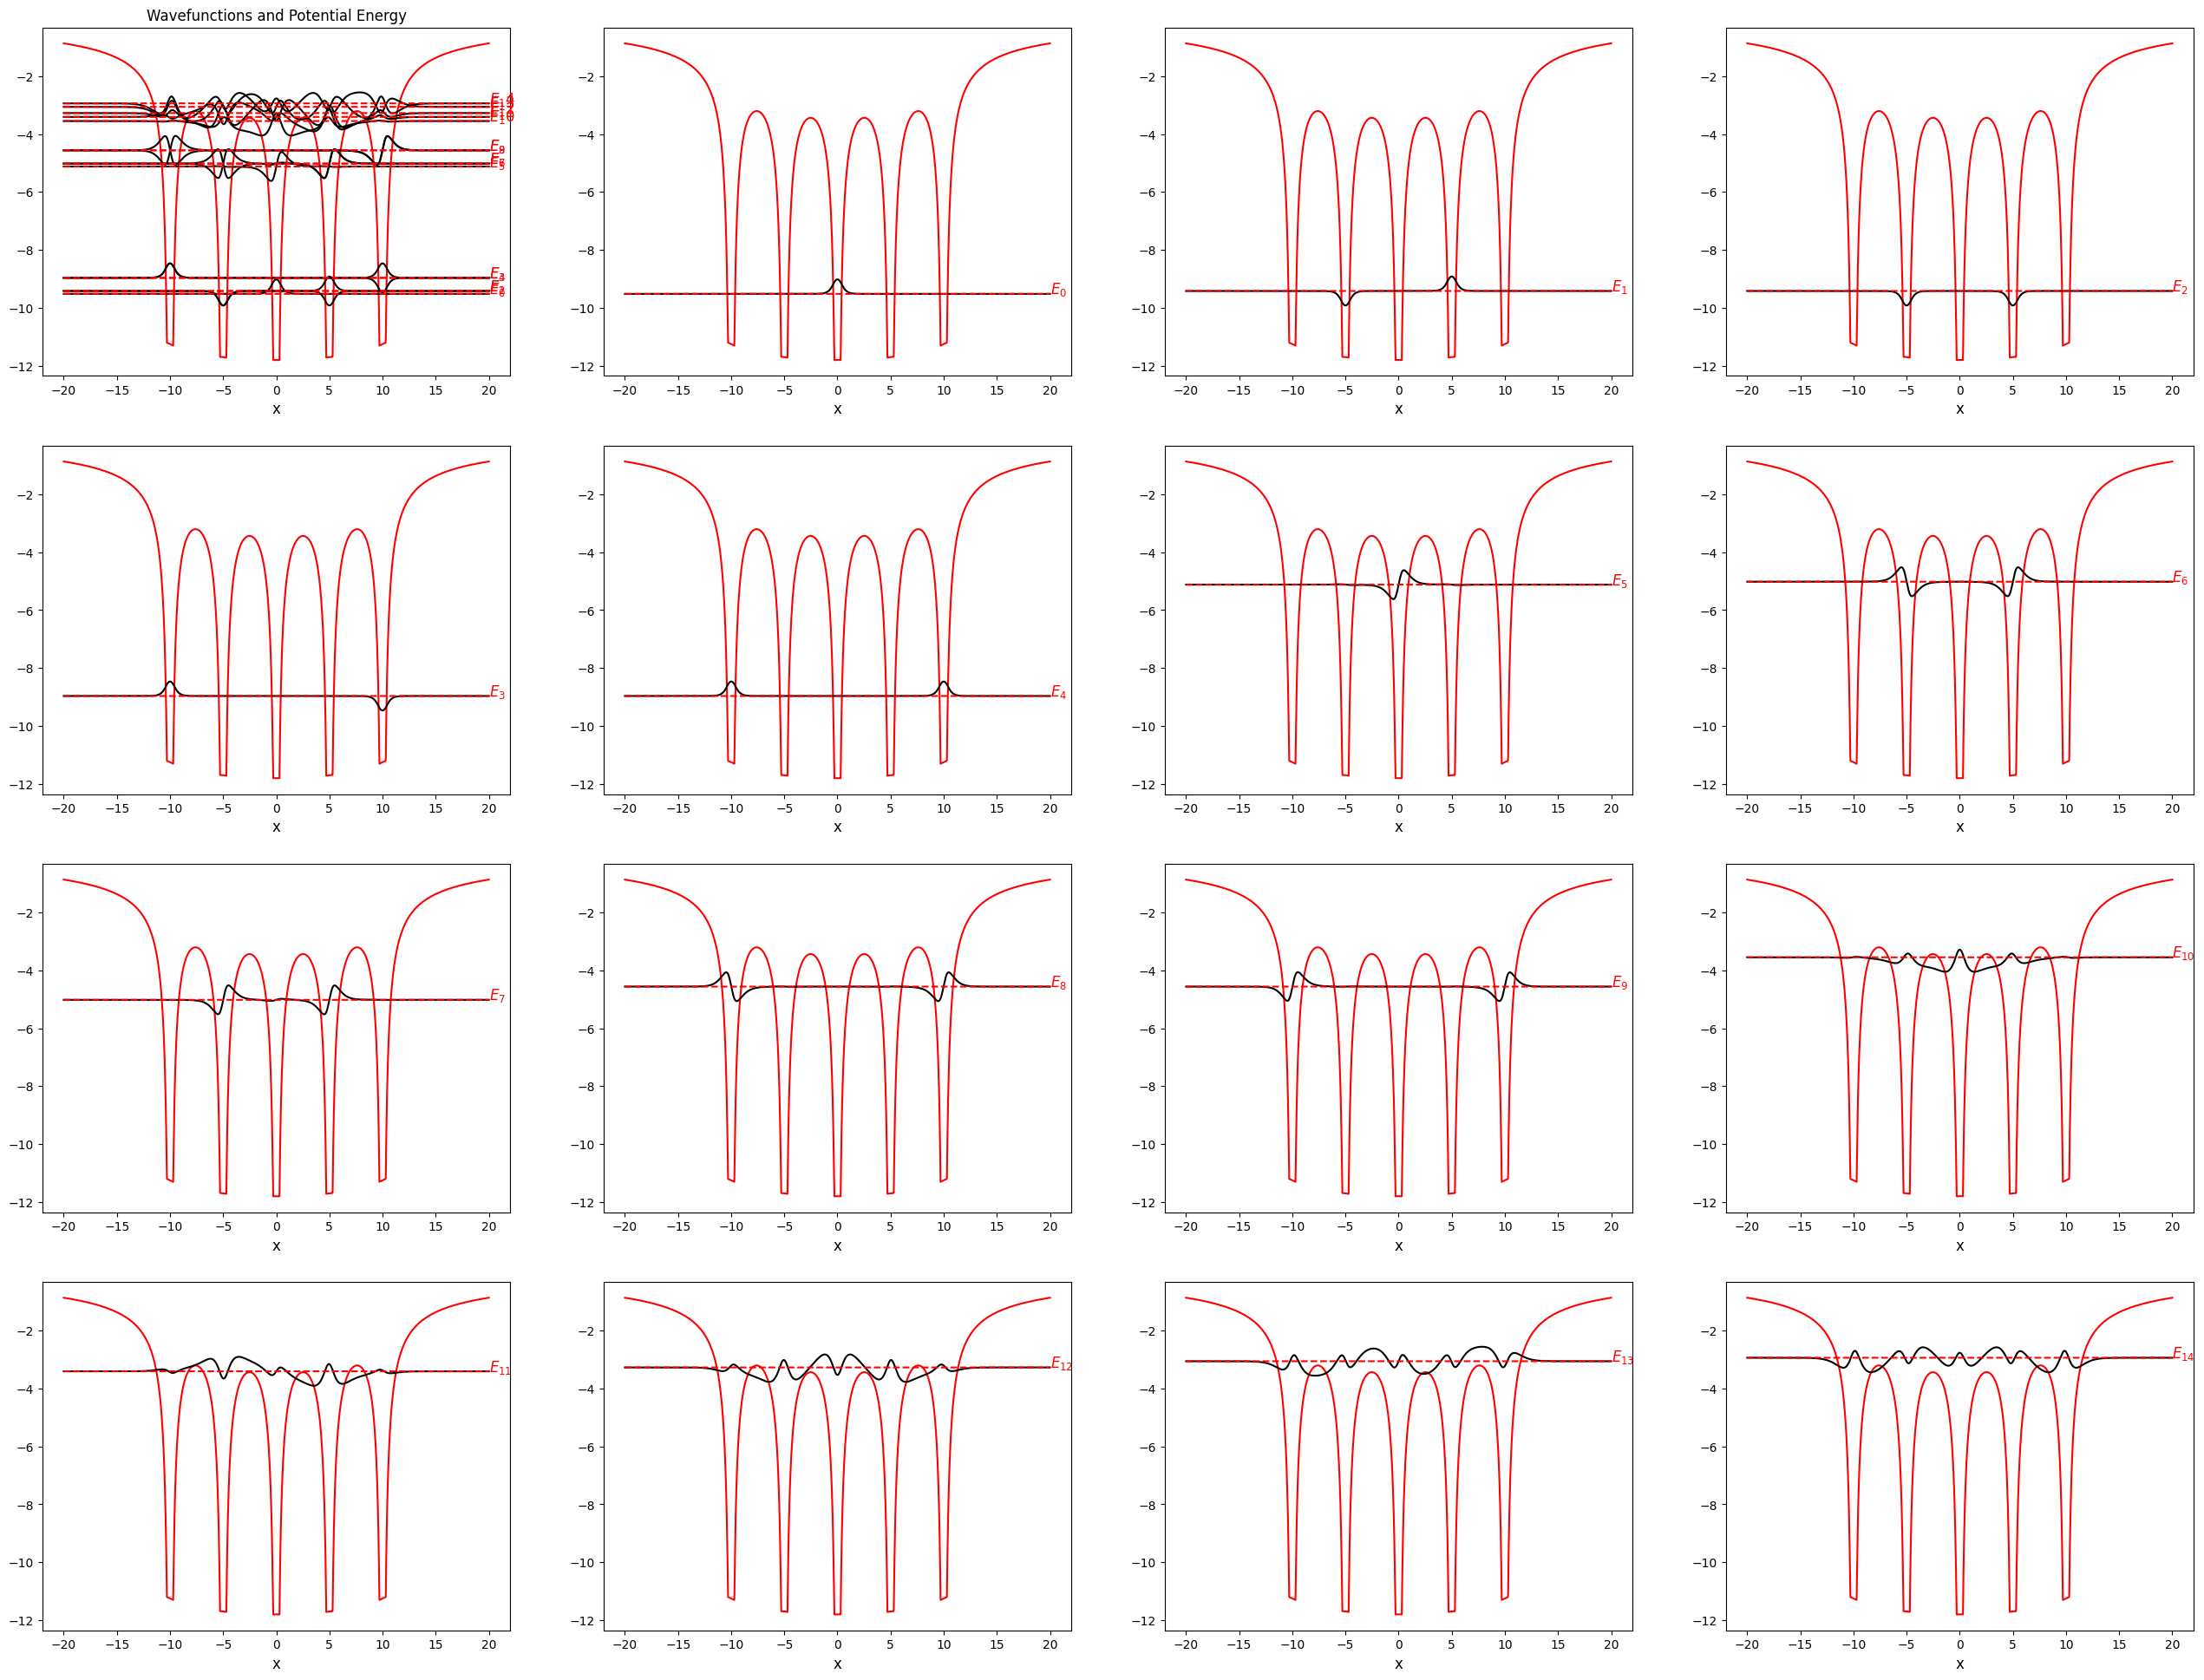

In [34]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 15, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)

_, ax = plt.subplots(4, 4, figsize=(8*4, 6*4))
ax = ax.flatten()
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)], ax = ax[0])
for ii in range(15):
    solver1D.plot_wavefunctions_and_potential(x, [E[ii]], [Psis[ii]], V_fun(x), labels = ['$E_{'+f'{ii}'+'}$',], ax = ax[ii+1], title='')

In this case, we simulate a train of 5 1/r potential energy. In the 1st figure, it is obvious that there are three group of energies, 0~4, 5~9, and 10~14. These groups correspond to the energy split of E0, E1, and E2 in single 1/r potential energy. For n = 0~4 cases, the wave functions that the electron is still be bounded by a singel nucleus. As n increases, the total energy is larger than the potential well of a single nucleus. The wave function is not bounded in a single nucleus but distribtuted over five nucleus.


# 1/r potential train 2 

In [35]:
""" setting """
m = 1
h_bar = 1

x = np.linspace(-40, 40, 5000) # cm
x0_train = [-30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0]

def V_fun(x:np.ndarray):
    V = np.zeros_like(x)
    for x0 in x0_train:
        V += potential.inverse_r_potential(x=x, x0 = x0, V1 = 3.0, V0 = 0.0, V_threshold = -10, n=1)
    return V

<Axes: xlabel='x', ylabel='V(x)'>

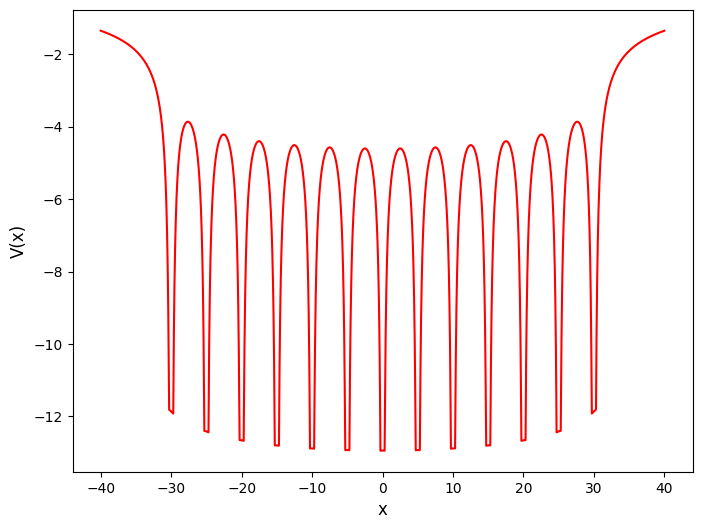

In [36]:
""" plot potential """
solver1D.plot_potential(x, V_fun(x) )

<Axes: title={'center': 'Wavefunctions and Potential Energy'}, xlabel='x'>

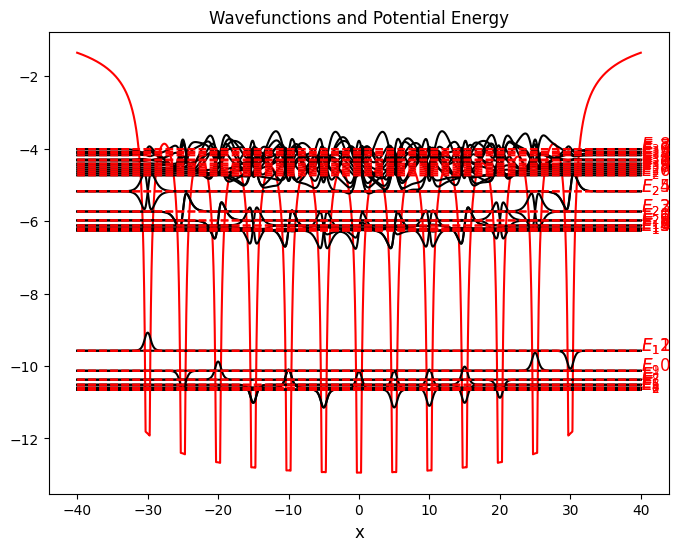

In [37]:
""" solve and plot """
E, Psis = solver1D.solve_Schrodinger_eq(x, V_fun, num_eigenvalues = 39, m=m, h_bar=h_bar)
Psis = solver1D.normalize_psi_max(Psis, factors=0.5)
solver1D.plot_wavefunctions_and_potential(x, E, Psis, V_fun(x), labels = [f'$E_{i}$' for i in range(E.size)])

In this case, we add more 1/r potential well (13 nucleus). There still three gourps of energy level, correspoinding to energy splits of E0, E1, and E2 in single 1/r potential well. It is obvious that as the number of potential well increase, the energy level density become densor and like a energy band. That's why the scientist would use energy band to describe a crystal.